# Part II - Data Findings
## by Lan Nguyen

## Investigation Overview

This investigation analyzes data from the Prosper lending platform, focusing on key features like loan terms, APR, Prosper Scores, employment statuses, borrower categories, loan statuses, and purposes. Initial steps involve data cleaning and refining. Univariate analysis examines feature distributions and prevalence. Bivariate analysis explores relationships between borrower attributes and lending outcomes. Multivariate analysis delves into complex interactions between Prosper Scores, APR, loan terms, and employment statuses. Overall, this investigation aims to uncover insights into borrowing trends, risk assessment, and lending dynamics within the Prosper platform.


## Dataset Overview

The dataset comprises 83,982 loans encompassing 21 attributes, which include variables like LoanOriginalAmount, BorrowerAPR, StatedMonthlyIncome, ProsperRating (Alpha), EmploymentStatus, and various others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan_data = pd.read_csv('Loan_cleaned.csv')
loan_data.head()

,Unnamed: 0,BorrowerAPR,Term,LoanStatus,ProsperScore,ProsperRating (Alpha),EmploymentStatus,Occupation,StatedMonthlyIncome,ListingCategory,CreationYear,CreationMonth
0,1,0.12016,36,Current,7.0,A,Employed,Professional,6125.000000,Home Improvement,2014,2
1,3,0.12528,36,Current,9.0,A,Employed,Skilled Labor,2875.000000,Motorcycle,2012,10
2,4,0.24614,36,Current,4.0,D,Employed,Executive,9583.333333,Home Improvement,2013,9
3,5,0.15425,60,Current,10.0,B,Employed,Professional,8333.333333,Debt Consolidation,2013,12
4,6,0.31032,36,Current,2.0,E,Employed,Sales - Retail,2083.333333,Debt Consolidation,2013,4


## What can be observed about the distribution of loan terms, Annual Percentage Rates (APRs), and Prosper Scores among the loan data?

Observations:

- There are three types of loan terms offered by Prosper: 12 months, 36 months, and 60 months. Among these, the 36-month term accounts for the majority of loans, while the 12-month term is significantly less common compared to the other two options.

- The distribution of Annual Percentage Rate (APR) appears to be multimodal. There are small peaks centered around 0.1 and 0.3, a larger peak centered around 0.2, and a distinct, sharp peak between 0.35 and 0.36. It is worth noting that only a very few loans have APR values greater than 0.43.

- The Prosper Score, which ranges from 1 to 10, shows varying frequencies among the different score levels. Most loans have Prosper Scores of 4, 6, or 8.

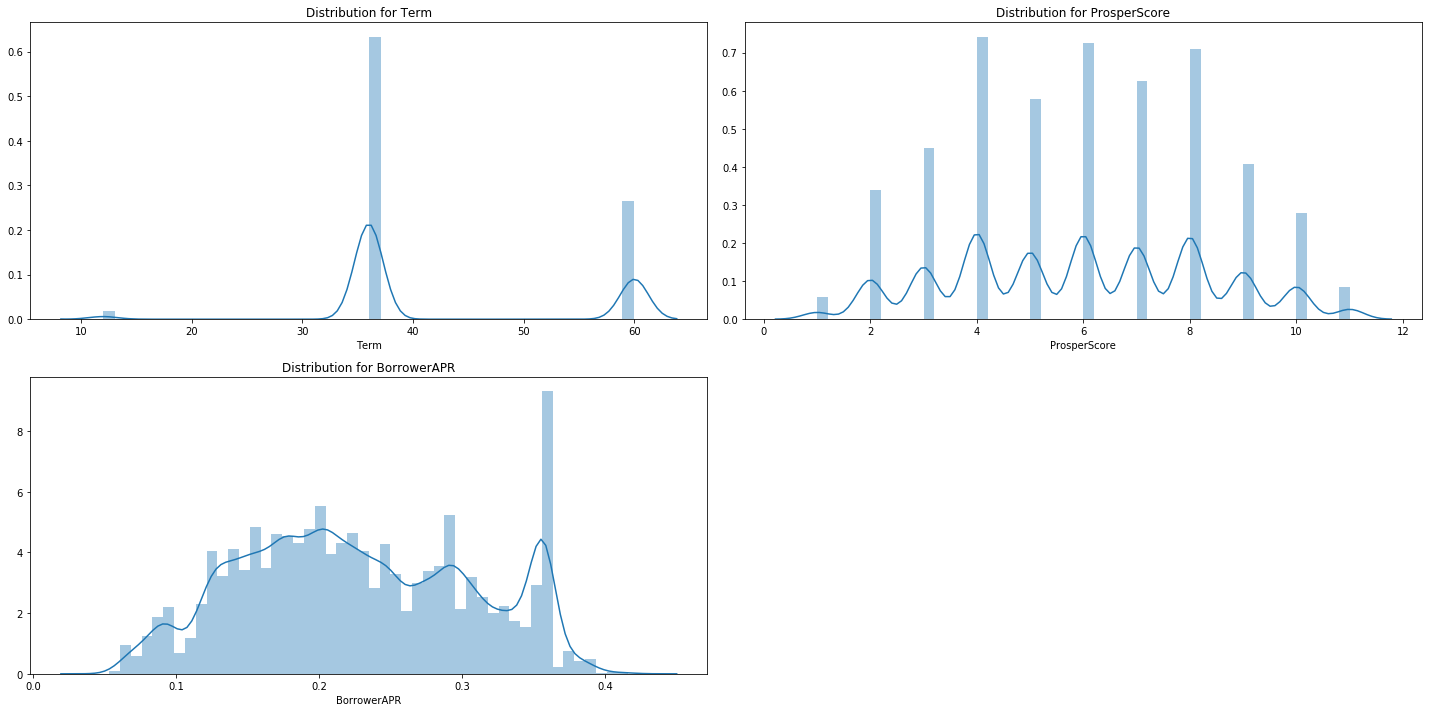

In [3]:
num_col_to_uni_explore = ['Term', 'ProsperScore', 'BorrowerAPR']
plt.figure(figsize=(20,10))
for n, col in enumerate(num_col_to_uni_explore):
    plt.subplot(2,2,n+1)
    sb.distplot(loan_data[col])
    plt.title("Distribution for {}".format(col))
    plt.tight_layout()

## What is the pattern of distribution for stated monthly income?

- The distribution of stated monthly income is heavily skewed to the right, with the majority of incomes falling below 30k. The peak of the distribution occurs around 6k, indicating that a significant number of borrowers have a monthly income in this range.

- However, it is important to note the presence of outliers at around 100k and 50k, which appear to be significantly higher than the rest of the data. These outliers should be carefully examined and, if necessary, removed to ensure a more accurate representation of the income distribution.

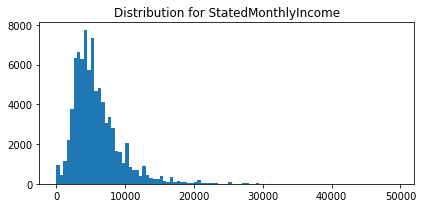

In [4]:
plt.figure(figsize=(6,3))
bins = np.arange(0, 50000, 500)
plt.hist(data=loan_data, x= 'StatedMonthlyIncome', bins = bins)
plt.title("Distribution for StatedMonthlyIncome")
plt.tight_layout()

## What key trends are observed in loan status, employment status, borrower categories, and loan purposes among the applicants?

- Loan Status: The majority of borrowers are diligently repaying their loans, as most of the loans are marked as "current." Additionally, a significant number of loans have been successfully completed, indicating a positive track record of loan fulfillment.

- Employment Status: A substantial 80% of borrowers are employed, highlighting a reliable and stable source of income among the applicants. This factor contributes to the lenders' confidence in the borrowers' ability to repay the loans.

- Borrower Categories: The two largest borrower groups are individuals classified as "other" and "professional." On the contrary, students represent the smallest segment among the borrower categories, suggesting that the loan applicants are primarily working professionals.

- Loan Purposes: Debt consolidation emerges as the most prevalent reason for borrowing, indicating that many borrowers seek to manage and streamline their existing debts. Conversely, loan applications for cosmetic procedures, baby adoption, and engagement rings are relatively infrequent, suggesting that these specific purposes are less common motivations for taking out loans.

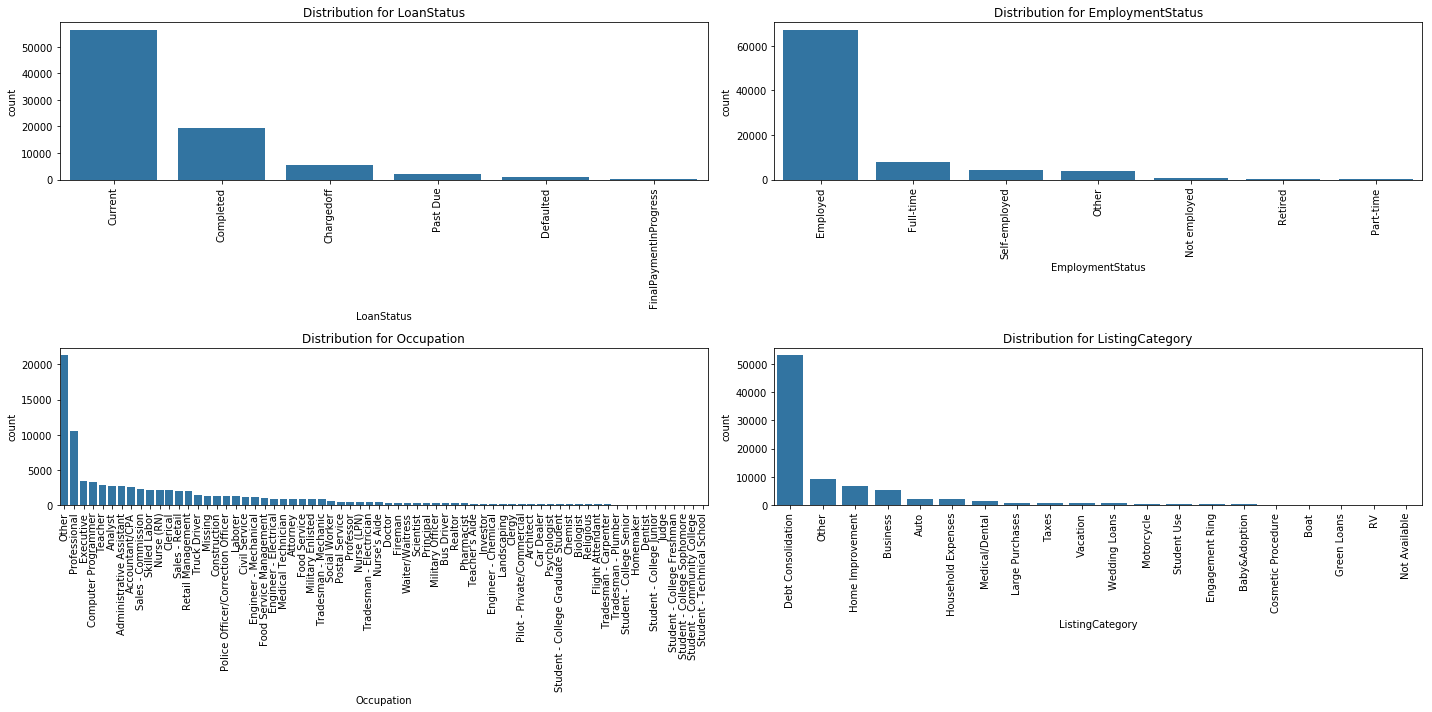

In [5]:
text_col_to_uni_explore = ['LoanStatus', 'EmploymentStatus', 'Occupation', 'ListingCategory']
default_color = sb.color_palette()[0]
plt.figure(figsize=(20,10))
for n,col in enumerate(text_col_to_uni_explore):
    plt.subplot(2,2,n+1)
    counts = loan_data[col].value_counts().sort_values(ascending=False)
    sb.countplot(data=loan_data, x=col, order=counts.index, color=default_color)
    plt.title("Distribution for {}".format(col))
    plt.xticks(rotation=90)
    plt.tight_layout()

## How have loan listing trends changed over time, and what patterns can be observed in loan application periods throughout the year?

- Over the years, the number of listings has shown a consistent upward trend, except for the year 2014, where complete data is not available. This growth in listings indicates a growing demand for loans over time.

- The loan applications tend to cluster around specific periods within each year. We observe higher activity in the beginning of the year, particularly in January and February, possibly indicating a higher need for financial assistance after the holiday season. Additionally, there is another surge in loan applications during the last half of the year, from September to December. This pattern could be attributed to various factors, such as year-end expenses, holiday preparations, or financial planning for the upcoming new year.

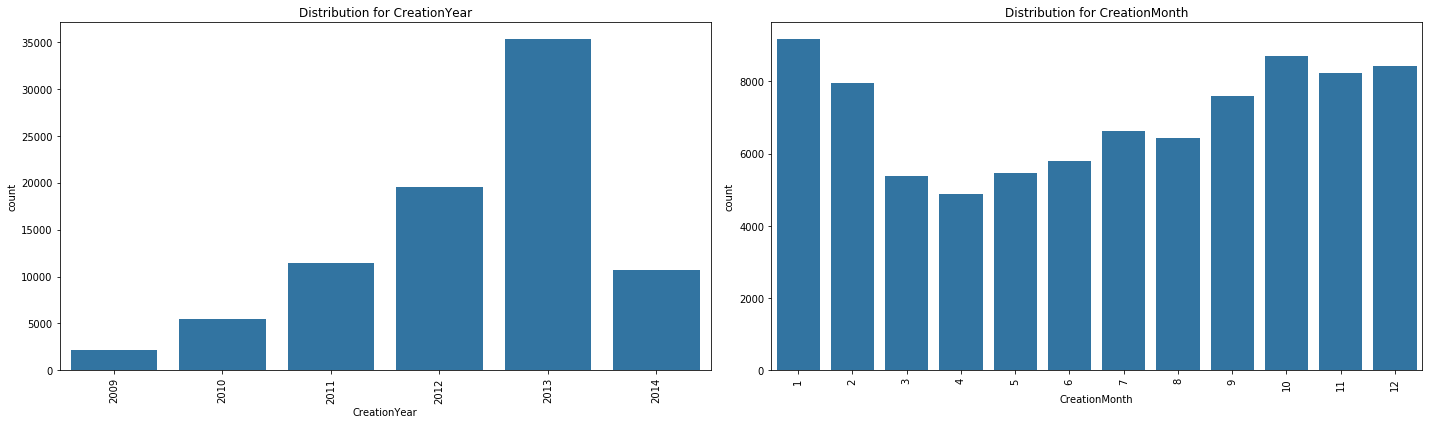

In [6]:
text_col_to_uni_explore = ['CreationYear',	'CreationMonth']
default_color = sb.color_palette()[0]
plt.figure(figsize=(20,6))
for n,col in enumerate(text_col_to_uni_explore):
    plt.subplot(1,2,n+1)
    counts = loan_data[col].value_counts().sort_index()
    sb.countplot(data=loan_data, x=col, order=counts.index, color=default_color)
    plt.title("Distribution for {}".format(col))
    plt.xticks(rotation=90)
    plt.tight_layout()

## Which borrower ocuppaction show the highest and lowest Borrower APR?

- Among different borrower categories, College Sophomores who are students have the highest Borrower APR, indicating that they generally face higher interest rates on their loans. Following closely are Teacher's Aides and Homemakers, who also tend to have relatively higher APRs.

- On the other hand, borrowers categorized as Student - Technical School have the lowest Borrower APR, implying that they typically enjoy more favorable interest rates on their loans. Additionally, Judges and Doctors are among the borrower categories with comparably lower APRs.

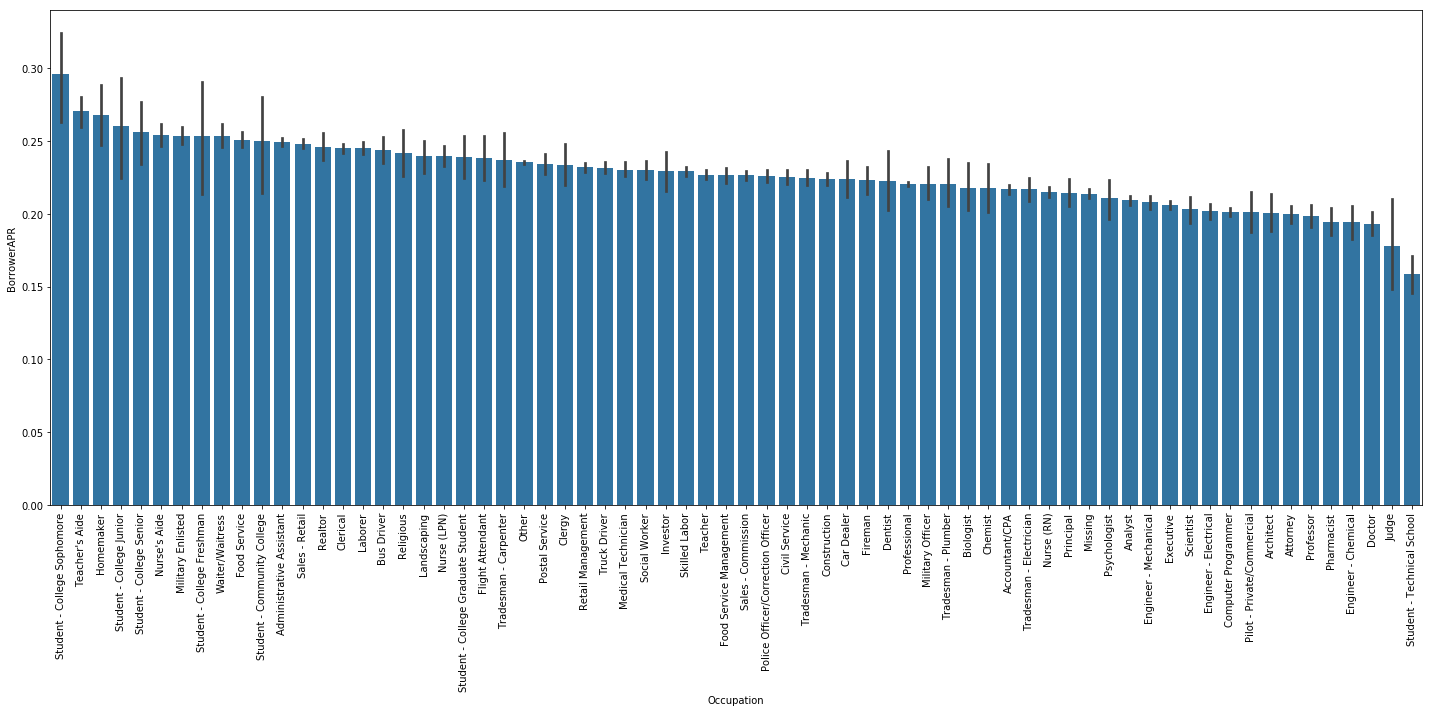

In [7]:
# plotting
base_color = sb.color_palette()[0]
plt.figure(figsize=(20,10))
means = loan_data.groupby('Occupation')['BorrowerAPR'].mean()
order = means.sort_values(ascending = False).index
sb.barplot(data = loan_data, x = 'Occupation', y = 'BorrowerAPR',
        color = base_color, order = order)
plt.xlabel('Occupation')
plt.xticks(rotation=90)
plt.tight_layout()


## Which borrower occupation show the highest and lowest Prosper Scores?

- Surprisingly, borrowers categorized as Student - Technical School exhibit the highest Prosper Scores, indicating that they are perceived as more creditworthy and financially stable. Following closely are Judges and Engineers - Chemical, who also have relatively high Prosper Scores.

- Conversely, borrowers identified as Student - College Sophomores have the lowest Prosper Scores, suggesting that they might be perceived as having a higher risk profile. Next in line are Realtors and individuals in the Landscaping industry, who also have comparatively lower Prosper Scores.

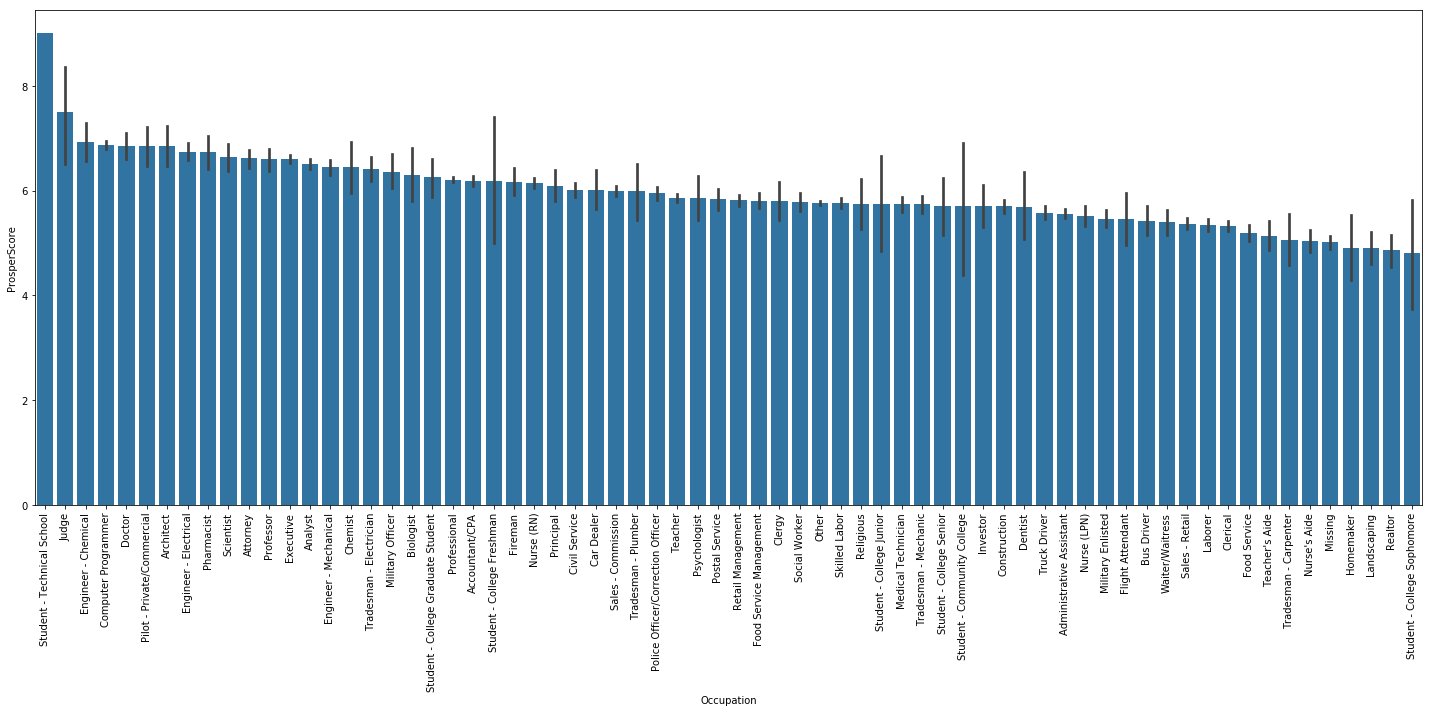

In [8]:
# plotting
base_color = sb.color_palette()[0]
plt.figure(figsize=(20,10))
means = loan_data.groupby('Occupation')['ProsperScore'].mean()
order = means.sort_values(ascending = False).index
sb.barplot(data = loan_data, x = 'Occupation', y = 'ProsperScore',
        color = base_color, order = order)
plt.xlabel('Occupation')
plt.xticks(rotation=90)
plt.tight_layout()

## How does employment status relate to Prosper Scores and Borrower APRs?

- Self-Employed Borrowers: Among the various employment categories, self-employed borrowers have the lowest Prosper Scores. Despite this, they have relatively higher Borrower APRs compared to other employment groups. This suggests that self-employed individuals might be perceived as higher-risk borrowers, leading to higher interest rates on their loans.

- Not Employed Borrowers: Similar to self-employed borrowers, those categorized as "not employed" also exhibit the lowest Prosper Scores. Despite their lack of employment, they have relatively higher Borrower APRs. This indicates that individuals without current employment may face challenges in obtaining favorable loan terms, resulting in higher interest rates on their loans.

The observations highlight the impact of employment status on both Prosper Scores and Borrower APRs, indicating that employment plays a crucial role in loan assessments and interest rate determination.

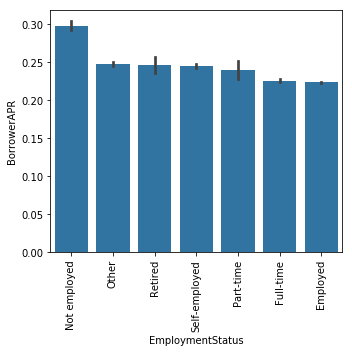

In [9]:
# plotting
plt.figure(figsize=(5,5))
base_color = sb.color_palette()[0]
means = loan_data.groupby('EmploymentStatus')['BorrowerAPR'].mean()
order = means.sort_values(ascending = False).index
sb.barplot(data = loan_data, x = 'EmploymentStatus', y = 'BorrowerAPR',
        color = base_color, order = order)
plt.xlabel('EmploymentStatus')
plt.xticks(rotation=90)
plt.tight_layout()


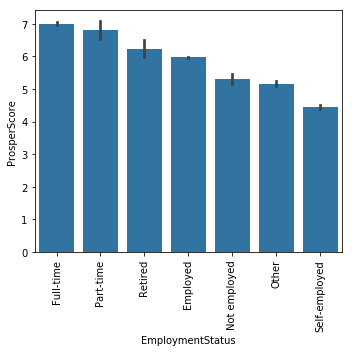

In [10]:
# plotting
plt.figure(figsize=(5,5))
base_color = sb.color_palette()[0]
means = loan_data.groupby('EmploymentStatus')['ProsperScore'].mean()
order = means.sort_values(ascending = False).index
sb.barplot(data = loan_data, x = 'EmploymentStatus', y = 'ProsperScore',
        color = base_color, order = order)
plt.xlabel('EmploymentStatus')
plt.xticks(rotation=90)
plt.tight_layout()

## What is the distribution of loan statuses among different borrower groups?

- Among the "Employed" and "Other" borrower groups, the majority of loans are in the "Current" status, indicating that most borrowers in these categories are actively repaying their loans.

- Conversely, in the "Full Time," "Self-Employed," "Not Employed," "Retire," and "Part Time" borrower groups, the highest percentage of loans is in the "Completed" status. This suggests that borrowers in these categories have successfully fulfilled their loan obligations.

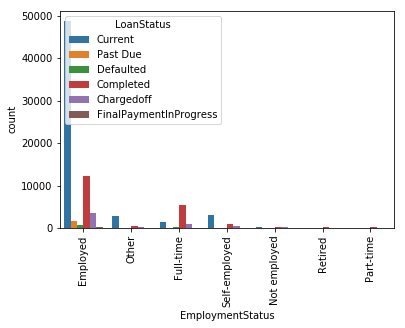

In [11]:
sb.countplot(data=loan_data, x='EmploymentStatus', hue='LoanStatus')
plt.xticks(rotation=90);

## Which Term type do the borrowers of different employment statuses consistently favor and what does this preference suggest?

Interestingly, all employment statuses are associated with the 36-month loan term. This finding indicates that regardless of the employment status of the borrowers (whether employed, self-employed, not employed, full-time, part-time, or retired), the 36-month term is the most preferred option for their loans. This consistency in loan term choice across employment categories suggests that the 36-month term is widely considered as a favorable and practical duration for borrowers from diverse employment backgrounds.

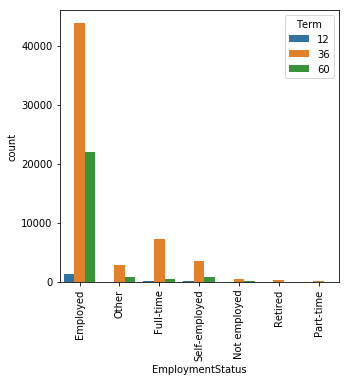

In [12]:
plt.figure(figsize=(5,5))
sb.countplot(data=loan_data, x='EmploymentStatus', hue='Term')
plt.xticks(rotation=90);

## How do Prosper Scores and Borrower APRs interrelate for each term?

For the 12-month loan term, there is an interesting trend regarding the Annual Percentage Rate (APR) concerning Prosper Scores:

- APR below 0.20: When the APR is below 0.20, there is a clear inverse relationship between the Prosper Score and the APR. Higher Prosper Scores are associated with lower APRs. However, it's worth noting that not all listings with a Prosper Score of 1 have APRs below 0.20.

- APR greater than 0.20: On the other hand, when the APR exceeds 0.20, all the listings have Prosper Scores less than 8, and some even have a Prosper Score of 1. This suggests that borrowers with lower Prosper Scores are more likely to have higher APRs when opting for a 12-month loan term.

When analyzing the 60-month loan term, distinct trends emerge based on Borrower Annual Percentage Rate (APR) and Prosper Scores:

- Borrower APR below 0.15: In this range, a clear relationship is observed, wherein higher Prosper Scores correspond to lower Borrower APRs. Borrowers with higher Prosper Scores tend to receive more favorable APRs, indicating that their creditworthiness positively influences the loan terms.

- Borrower APR greater than 0.15: For APRs exceeding 0.15, the distribution of Prosper Scores appears to be relatively even across the board. All listings in this range have Prosper Scores less than 8, with some even having a Prosper Score of 1. This implies that, regardless of Prosper Score, borrowers seeking loans with APRs above 0.15 are subject to similar lending terms.

Overall, the 60-month term presents interesting patterns in Borrower APR and Prosper Scores, with significant implications for loan approval and interest rates.

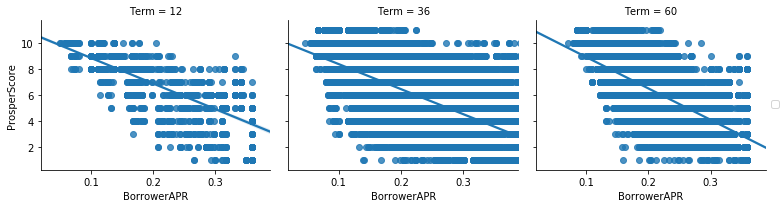

In [15]:
# Prosper rating effect on relationship of APR and loan amount
g=sb.FacetGrid(data=loan_data, aspect=1.2, col='Term', col_wrap=3)
g.map(sb.regplot, 'BorrowerAPR', 'ProsperScore');
g.add_legend();

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt